In [78]:
%matplotlib inline

In [154]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [155]:
# Files to load
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [156]:
#Reviewing the data
city_data_df.isnull().sum()
ride_data_df.isnull().sum()
city_data_df.dtypes
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [157]:
ride_data_df.head(4)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178


In [158]:
city_data_df.head(4)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban


In [159]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [160]:
# Get the number of data points from the Urban, Suburban, and Rural cities.
urban_sum = sum(city_data_df["type"]=="Urban")
suburban_sum = sum(city_data_df["type"]=="Suburban")
rural_sum = sum(city_data_df["type"]=="Rural")
rural_sum

18

In [161]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left" , on=["city", "city"])
pyber_data_df.head(4)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban


In [162]:
# Create the Urban, Suburban, and Rural city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [163]:
# Get the number of rides for urban, suburban, and rural cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [164]:
# Get average fare for each city in the urban, suburban , and rural cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [165]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

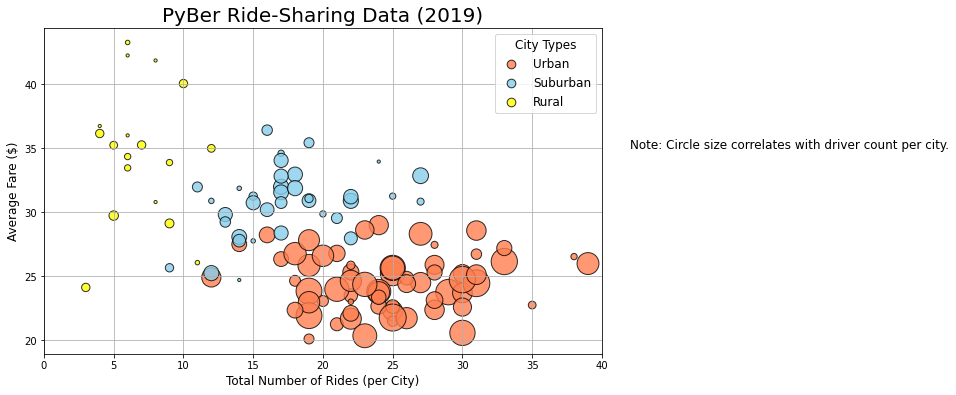

In [166]:
#Create a Scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(urban_ride_count, urban_avg_fare, marker = "o", color = "coral",
           label = 'Urban', s=10*urban_driver_count, linewidth=1, edgecolor='k',  alpha=0.8)

ax.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, marker = "o", color = "skyblue",
           label = 'Suburban', linewidth=1, edgecolor='k',  alpha=0.8)

ax.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, marker = "o", color = "yellow",
           label = 'Rural', linewidth=1, edgecolor='k',  alpha=0.8)

# Create labels for the x and y axes.
plt.xlabel('Total Number of Rides (per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)

# Create a title.
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)

#Add a limit for x-axis
plt.xlim(0, 40)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png", dpi=100, format=None, metadata=None,
        bbox_inches='tight', pad_inches=0.8,
        facecolor='w', edgecolor='w',
        backend=None)

plt.show()


In [167]:
# Get summary statistics.
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [177]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count:.2f}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count:.2f}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).
The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is17.00.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).
The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is6.00.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [184]:
# Get the fares for the urban,suburban, and rural cities.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [190]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is {mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is {median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is {mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is {median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is {mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is {median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean for the ride counts for urban trips is 24.53.
The median for the ride counts for urban trips is 24.64.
The mode for the ride counts for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean for the ride counts for suburban trips is 30.97.
The median for the ride counts for suburban trips is30.75.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean for the ride counts for rural trips is 34.62.
The median for the ride counts for rural trips is37.05.
The mode for the ride counts for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [193]:
# Get the driver count data from the urban, suburban, and rural cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [197]:
# Calculate the measures of central tendency for the drivers for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean for drivers in urban cities is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median for drivers in urban cities is {median_urban_drivers:.0f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for drivers in urban cities is {mode_urban_drivers}.")

# Calculate the measures of central tendency for the drivers for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean for drivers in suburban cities is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median for drivers in suburban cities is {median_suburban_drivers:.0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode for drivers in suburban cities is {mode_suburban_drivers}.")

# Calculate the measures of central tendency for the drivers for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean for drivers in rural cities is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median for drivers in rural cities is {median_rural_drivers:.0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode for drivers in rural cities is {mode_rural_drivers}.")

The mean for drivers in urban cities is 37.
The median for drivers in urban cities is 37.
The mode for drivers in urban cities is ModeResult(mode=array([39]), count=array([86])).
The mean for drivers in suburban cities is 14.
The median for drivers in suburban cities is 16.
The mode for drivers in suburban cities is ModeResult(mode=array([20]), count=array([79])).
The mean for drivers in rural cities is 4.
The median for drivers in rural cities is 4.
The mode for drivers in rural cities is ModeResult(mode=array([1]), count=array([32])).


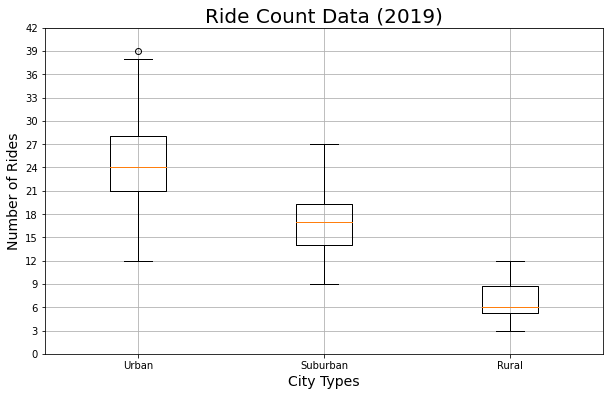

In [209]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Fig2.png", dpi=72, format=None, metadata=None,
        bbox_inches='tight', pad_inches=0.8,
        facecolor='w', edgecolor='w',
        backend=None)
plt.show()

In [202]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


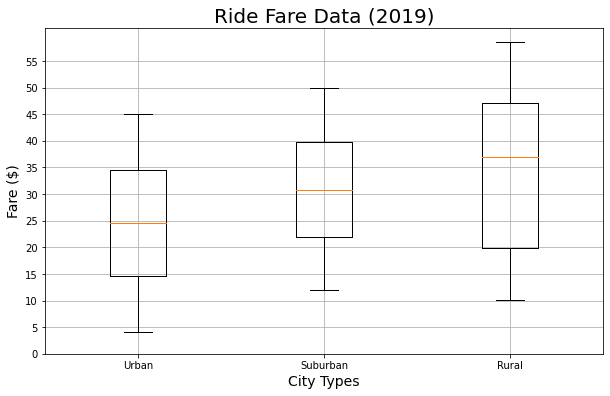

In [210]:
# Add all fares box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("Fig3.png", dpi=72, format=None, metadata=None,
        bbox_inches='tight', pad_inches=0.8,
        facecolor='w', edgecolor='w',
        backend=None)
plt.show()

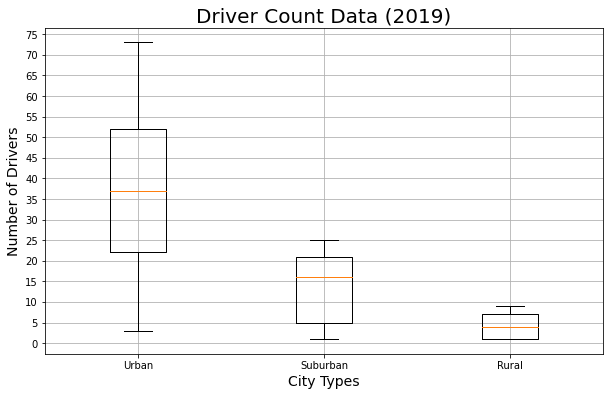

In [211]:
# Add all drivers count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(driver_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("Fig4.png", dpi=72, format=None, metadata=None,
        bbox_inches='tight', pad_inches=0.8,
        facecolor='w', edgecolor='w',
        backend=None)
plt.show()